# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [13]:
# Ensure plots show up in the notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [14]:
df['bpm'].plot(kind='hist')

<Axes: ylabel='Frequency'>

In [15]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

In [16]:
df['mode'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

In [17]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

In [18]:

filtered_df = df.loc[(df['bpm'] >= 85) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4


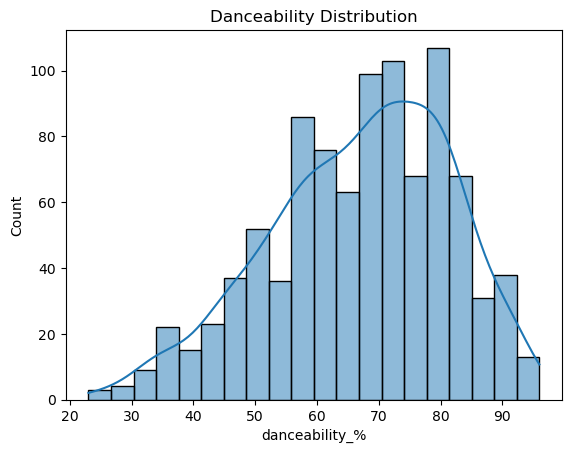

In [23]:
sns.histplot(df['danceability_%'], bins=20, kde=True)
plt.title('Danceability Distribution')
plt.show()


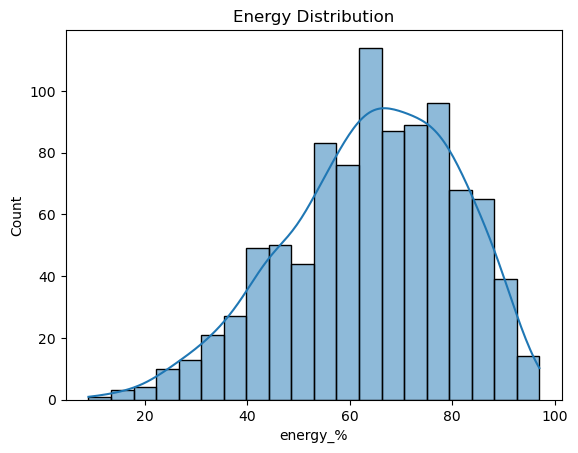

In [24]:
sns.histplot(df['energy_%'], bins=20, kde=True)
plt.title('Energy Distribution')
plt.show()


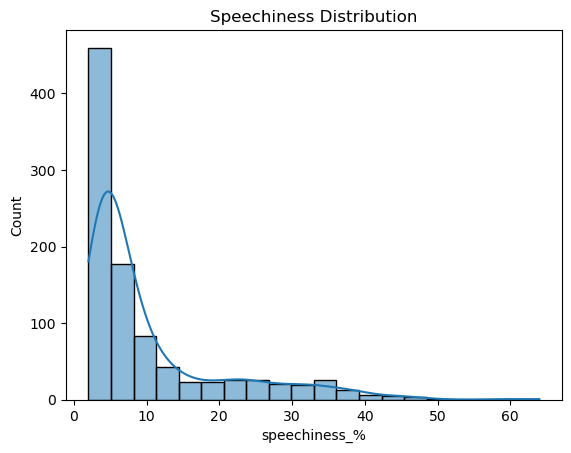

In [25]:
sns.histplot(df['speechiness_%'], bins=20, kde=True)
plt.title('Speechiness Distribution')
plt.show()


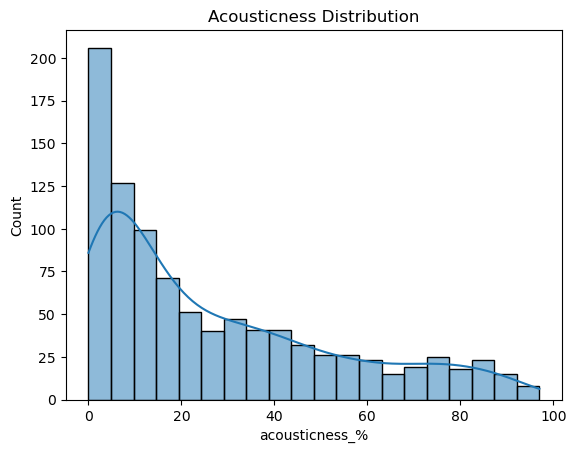

In [29]:
sns.histplot(df['acousticness_%'], bins=20, kde=True)
plt.title('Acousticness Distribution')
plt.show()


### Typical Smash Hit Values
- BPM: 120-130
- Key: A
- Mode: Minor
- Danceability: 70-85%
- Energy: 60-80%
- Speechiness: <30%
- Acousticness: <30%


In [43]:
smash_hits = df[
    (df['bpm'].between(120, 130)) &
    (df['key'] == 'A') &
    (df['mode'] == 'Minor') &
    (df['danceability_%'] >= 60) &
    (df['energy_%'] >= 60) &
    (df['speechiness_%'] < 30) &
    (df['acousticness_%'] < 30)
]

smash_hits[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False)


,track_name,artist(s)_name,streams
150,Mi Bello Angel,Natanael Cano,31873544
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",1897517891


In [54]:
print("Before:", smash_hits.shape[0])  # Number of songs matching original criteria

#test for difference in ranges
smash_hits = df[
    (df['bpm'].between(110, 130)) &
    (df['key'] == 'A') &
    (df['mode'] == 'Minor') &
    (df['danceability_%'] >= 50) &
    (df['energy_%'] >= 60) &
    (df['speechiness_%'] < 90) &
    (df['acousticness_%'] < 40)
]

print("After:", smash_hits.shape[0])   # New number of songs


Before: 2
After: 5


In [53]:
# Finding my song to compare
song = df[
    (df['track_name'].str.contains('Dance the Night', case=False)) &
    (df['artist(s)_name'].str.contains('Dua Lipa', case=False))
]

song[['track_name','artist(s)_name','bpm','key','mode','danceability_%','energy_%','speechiness_%','acousticness_%']]


,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
29,Dance The Night (From Barbie The Album),Dua Lipa,110,B,Minor,67,85,5,2
